# House Sales King County Project : #1 DS Project by Christian Robledo


![title](county.jpg)

# Business Understanding 


***
The following project analyses House Sales data taken from King County between 2014-2015. The main objective
is to predict the house pricing based on several given features to so give recommendations to potential home sellers and buyers.
The methodology covers all steps of a [DATA SCIENCE LIFE CYCLE](https://www.educba.com/data-science-lifecycle/) in order to achieve the objective. The applied model for prediction is conducted by means of multinear regression.
***

# Set Up for the Analysis

***



In order to conduct the preprocessing of the data and the predictive analysis the following libraries were used:


***

In [4]:
# importing of libraries
import pandas as pd
import math
import numpy as np
import seaborn as sns
import datetime as dt
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib.gridspec import GridSpec
from scipy.stats import kstest
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
#Subplots
from plotly.subplots import make_subplots
import folium as folium
import branca.colormap as cm

# Data Mining

## Import the Dataset

In [5]:
# Load the Data
df= pd.read_csv('King_County_House_prices_dataset.csv',delimiter=',') 

## Dataset info

In [6]:
# First 5 rows of our dataset
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
#Last 5 rows of our dataset
df.tail() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [8]:
# Columns in our dataset
df.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Number of rows and columns
df.shape

(21597, 21)

Our dataset consits of __21597 rows__ and __22 columns__

In [10]:
#Description of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
# Skewness of our dataset
df.skew()

id                0.243226
price             4.023365
bedrooms          2.023641
bathrooms         0.519709
sqft_living       1.473215
sqft_lot         13.072604
floors            0.614497
waterfront       11.343651
view              3.399526
condition         1.036037
grade             0.788237
sqft_above        1.447434
yr_built         -0.469450
yr_renovated      4.573385
zipcode           0.405322
lat              -0.485522
long              0.884888
sqft_living15     1.106875
sqft_lot15        9.524362
dtype: float64

- Skewness tells us about the symmetry in a distribution.
- If Skewness is equal to zero , It is a symmetrical distribution.
- And If Skewness is less than or more than zero then it is a non-symmetrical distribution.
- If value is less than zero , distribution is left skewed and value is more than zero , distribution is right skewed.
- In our above data,
    - sqft_lot15
    - waterfront
    - sqft_lot
- Are highly positively,right skewed.

In [12]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


- Our dataset features consists of three datatypes:
    - integer
    - float
    - object
- Of which __numerical features are 17__
- And __categorical features are 4__ 
    - waterfront
    - view
    - condition
    - grade
- Some datatypes are incorrect or show inconsistencies :
    - date : is an object type --> needs to be transformed to date type
    - price: is a float type --> for simplification should be changed to int type
    - bathrooms/floors/waterfront/view/yr_renovated: are float type --> needs to be analyzed closerly
    - waterfront/yr_renovated/view have missing values

# Data Cleaning


## Drop of unesecarry features

In [13]:
# Drop of the id columns since it is not requiered
df.drop(columns=['id'],axis=1,inplace=True)
#df.drop(columns=['zipcode'],axis=1,inplace=True)

## Missing Values

In [14]:
# How much missing data do we have in total in our dataset?
df.isna().sum().sum() 

6281

- 6281 Values are missing in our dataset

In [15]:
# Hoy much missing data do we have for each feature
df.isnull().sum() 

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- The following columns have missing values
    - waterfront
    - yr_renovated
    - view 


### Waterfront

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

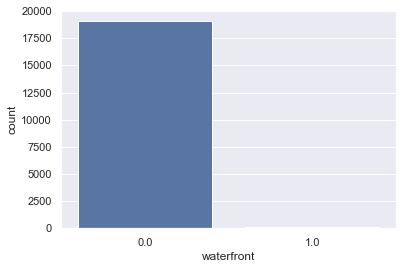

In [16]:
# Lets take a closer look at the waterfront feature
sns.countplot(df['waterfront'])
df.waterfront.value_counts(dropna=False).head()

- Most of the data in waterfront has the value 0

In [17]:
# Replaces nan with the value 0
df.waterfront.replace(to_replace=[np.nan], value=0, inplace=True);

### View

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

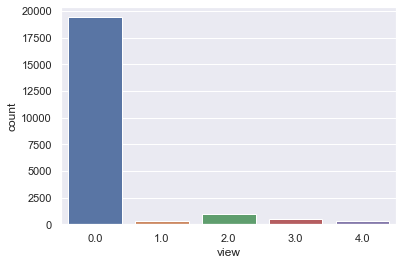

In [18]:
# Lets take a closer look at the waterfront feature
# Displays the view feature
sns.countplot(df['view'])
df.view.value_counts(dropna=False).head()


- Most of the data accepts a value of 0

In [19]:
# Replaces nan with the value 0
df.view.replace(to_replace=[np.nan], value=0, inplace=True);

### Years renovated

In [20]:
#removing no.nan from years renovated
df.yr_renovated.value_counts(dropna=False).head()
df.yr_renovated.replace(to_replace=[np.nan], value=0, inplace=True);

## Bedrooms

In [21]:
# Value counts of bedrooms feature
df.bedrooms.value_counts(dropna=False).head()

3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64

In [22]:
#Drop 33 bedroom row
toDrop = df.loc[df['bedrooms'] == 33,'bedrooms'].index.tolist()
df.drop(toDrop, axis = 0, inplace = True)


## Configure Data types

Unexpected are listed below:
1. **date** should be a DateTime type
2. **price** can be integer. Decimal float point values are of no interest
3. **bathrooms** follows this calculation: [bath](https://illinado.com/what-is-a-quarter-bath/)
4. **floors** .5-values are pitched-roof stories
5. **waterfront**, **view**, **yr_renovated**, **sqft_basement** can be converted to integer type

### Date column

In [23]:
# The date columns is modified to be a datetime datatype
df['date'] = pd.to_datetime(df['date']) #turn date column to date type
df['month'] = pd.DatetimeIndex(df.loc[:,'date']).month #Create month column
df['year'] = pd.DatetimeIndex(df.loc[:,'date']).year #create year column
datetime=[df['year'],df['month'],df['date']]

### Price column

In [24]:
# Convert price to an int type
df['price'] = (df.price).apply(lambda val: int(val))

### Years renovatedt column

In [25]:
# Convert yr_renovated to an int type
df['yr_renovated'] = (df.yr_renovated).apply(lambda val: int(val))

### View

In [ ]:
# Convert view to an int type
df['view'] = (df.view).apply(lambda val: int(val))

### sqft Basemant

In [ ]:
# Convert sqft Basement to an int type
df.sqft_basement.replace(to_replace=['?'], value=df.sqft_basement.mode(), inplace=True);
df['sqft_basement'] = df['sqft_basement'].astype(float).round(0).astype(int)


### waterfront

In [ ]:
# Convert waterfront to an int type
df['waterfront'] = (df.waterfront).apply(lambda val: int(val))

# Data Exploration

## Dependant Feature : Price

In [ ]:
# Description of the prediction value
df['price'].describe()

- Our target feature is a continuos with values ranging from 78.000 to 7.7000000
- The average sale price of all the houses in our dataset is 540.296

In [ ]:
# Distribution of the price 
sns.set()
plt.figure(figsize=(20,10))
ax = sns.distplot(df['price'],kde=False)
plt.xlim([200000,2000000])
plt.title('House Prices In Kings County')
plt.xlabel('House Prices In Kings County')
plt.ylabel('Count')
plt.savefig("Histogram.png")

- Most of the house prices are in the range from 78000-2.5million dollars
- The distribution is skewed thowards cheaper homes

In [ ]:
# Logarathmic Distribution
ax = sns.distplot(np.log(df['price']),kde=False,bins=25)

- Applying the log on the price gives a more symmetric distribution
- Ensures that the relative error for cheaper and more expensive houses are treated more equally
- The log will be therefore used for setting up the prediction model

In [ ]:
# Adding a column with the log of the price to the dataframe
df['log_price'] = np.log(df['price'])

#df.drop(['price'], axis=1,inplace=True)
#df['log_price'] = (df.log_price).apply(lambda val: int(val))

In [ ]:
# Distribution and box plot 
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df['log_price']),row=1,col=1)
fig.add_trace(go.Box(y=df['log_price'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box Plot")

- The price has a slight right skew distribution
- The median sale price is 450.000 which is less than the average value. This is because the slight right skew of our data (high price houess from 3M-/7M )

## Independant Features

- In this section the predictive features are going to be analyzed more closerly. For that it is important to distinguish between:
    - Discrete Features
    - Continuos Features
    - Categorical Features
    - Date Featuers 

### Discrete  and Categorical Features

In [ ]:
# Grabs the discrete/categorical features 
discrete_categorical=[]
for col in df.columns:
    if df[col].dtype=='int64' and len(df[col].unique()) <=20:
        discrete_categorical.append(col)
print("Discrete Features :: \n\n{}".format(discrete_categorical))

In [ ]:
#Let's have a look at the unique values of each of these features
for col in discrete_categorical:
    print("{} has {} unique values.".format(col,df[col].unique()))

In [ ]:
# Barplots are created for the discrete/categorical features the date related features will be analyzed seperately
fig = plt.figure(constrained_layout=True,figsize=(20,15))
gs = GridSpec(4, 2, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.barplot(data=df,x="bedrooms",y="price",palette='hot')
plt.xlabel("bedrooms",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1 = sns.barplot(data=df,x="waterfront",y="price",palette='magma')
plt.xlabel("waferfront",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,-1])
a1 = sns.barplot(data=df,x="view",y="price",palette='hot')
plt.xlabel("view",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)


plt.subplot(gs[2,:-1])
a1 = sns.barplot(data=df,x="grade",y="price",palette='magma')
plt.xlabel("grade",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)


plt.subplot(gs[2,-1])
a1 = sns.barplot(data=df,x="condition",y="price",palette='hot')
plt.xlabel("condition",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,:])
a1 = sns.barplot(data=df,x="bathrooms",y="price",palette='hot')
plt.xlabel("bathrooms",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.savefig("Categorical.png")
#plt.subplot(gs[3,:-1])
#a1 = sns.barplot(data=df,x="month",y="price",palette='hot')
#plt.xlabel("month",fontsize=15)
#plt.ylabel("Average SalePrice",fontsize=15)

#plt.subplot(gs[3,:])
#a1 = sns.barplot(data=df,x="sqft_basement",y="price",estimator=median,palette='magma')
#plt.xlabel("sqft_basement",fontsize=15)
#plt.ylabel("Average SalePrice",fontsize=15)


- Bedrooms: The price of a house increases with the higher number of bedrooms but are decreasing for a bedroom number till 10
- waterfront: Houses which are located to the watersite are selled at a higher price
- View: Houses with a category of 4 are selled at a higher price
- Grade: With increasing rate the house prices are incresing
- Condition: Housese with condition values higher than 3 sell at higher prices
- The price of a house with up to 6.25 bathrooms increases in a linear fashion. A peak can be denoted at 7.75 bathrooms

### Continuos Features

In [ ]:
#Here we create a list of all the numerical features in our dataset.
#And we have already separated the discrete features.
#But we separate year features , as we will study them later.
num = []

for col in df.columns:
    if df[col].dtype=='int64' and col not in ['date','yr_built','yr_renovated','zipcode'] and col not in discrete_categorical:
        num.append(col)
print("Numerical Features :: \n\n{}".format(num))

df_corr=df[num]
df_corr['log_price'] = df['log_price']
corr = df_corr.corr()

In [ ]:
# Correlation Heatmap
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

- The highest correlation with the log_price is with the feature sqft_living = 0.7
- High correlation can be also seen with sqft_above and sqft_living 15
- Unexpectively the sqft_lot feature has a considerably low correlation with the log_price

In [ ]:
# Pairplot of sqft_above , sqft_living, sqft_lot and sqft_basement
sns.pairplot(df, 
             x_vars=["sqft_above", "sqft_living", "sqft_lot", "sqft_basement"], 
             y_vars=["log_price"],hue='waterfront')
plt.savefig("scatters_ft.png")

- As we could also detect on the correlation map the sqft_living and sqft_above feature have a high influence on sale price
- On the other hand sqft lot and sqft_bqsement seem to be less relevant for the increase of the price
- Houses with a waterfront clearly are selled for higher prices

In [ ]:
# Pairplot
num_cols = ['log_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_above', 'grade', 'lat', 'sqft_basement', 'view', 'floors', 'waterfront'] 
sns.pairplot(df.loc[:, num_cols], hue='waterfront', 
             palette="seismic", diag_kind="kde", 
             height=2)

- The Scatterplot shows us the extent of correlation of the above positive correlated features from the heatmap. 
- We can see that as the features on x axis increases, the prices also increases
- Houses that have a waterfront sell for higher prices

In [ ]:
# Price vs sqft_living considering the view (columns), grade (rows) with waterfront as the hue
g = sns.FacetGrid(df, 
                  col='view', 
                  row='grade',  
                  hue='waterfront', 
                  palette='Set1') 
g = (g.map(plt.scatter, 'sqft_living', 'log_price').add_legend()) 

- Most of the houses are from grade 5-11
- Waterfront houses have the better views 
- Price increase as the grade increases
- The houses with higher view feature sell at the upper end of the price range
- As the grade increases the square foot living size increases as well

In [ ]:
# Price vs sqft_living considering the view, condition with waterfront as the hue
g = sns.FacetGrid(df, 
                  col='view', 
                  row='condition',  
                  hue='waterfront', 
                  palette='Set1') 
g = (g.map(plt.scatter, 'sqft_living', 'log_price').add_legend()) 

- Most of the houses are between condition 3 and 5
- Waterfront houses are mainly seen at high views starting at condition 3 

In [ ]:
g = sns.FacetGrid(df, 
                  col='grade', 
                  row='bedrooms',  
                  hue='waterfront', 
                  palette='Set1') 
g = (g.map(plt.scatter, 'sqft_living', 'log_price').add_legend()) 

### Date Features

In [ ]:
# Plotting year features
year_features = ['date','month','year','yr_built']
for feature in year_features:    
    fig = plt.figure(figsize=(10,5))
    ax = df.groupby([feature])['log_price'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

    

- The selling price depicts a peak in the month of April 2014
- It further decreases but stays relatively high between May and July 2014
- Further the price decreases irregularely during the winter months
- The house price increases linearly over the period of one year by 20%
- The age of the house more specifically when the house was built doesnt seem to have an influence on the price

In [ ]:
# Age of the house

data=df.copy()
data['Sold-Built'] = data['year'] - data['yr_built']
fig=px.scatter(data,x="Sold-Built",y="log_price",width=700)
fig.show()



- As explained before the Age of the House doesnt give have an influence on the selling price

In [ ]:

fig=px.box(data,x="waterfront",y="price",width=700)
fig.show()

## Geographic Features

In [ ]:
# To be completed

# Feature Engineering

## Converting Categorical Variables

In [ ]:
#Get Dummies 
dummies = pd.get_dummies(df.loc[:, 'condition'], drop_first = True)
df[list(dummies.columns)] = dummies
dummies = pd.get_dummies(df.loc[:, 'view'], drop_first = True)
df[list(dummies.columns)] = dummies
dummies = pd.get_dummies(df.loc[:, 'grade'], drop_first = True)
df[list(dummies.columns)] = dummies
dummies = pd.get_dummies(df.loc[:, 'waterfront'], drop_first = True)
df[list(dummies.columns)] = dummies
dummies = pd.get_dummies(df.loc[:, 'zipcode'], drop_first = True)
df[list(dummies.columns)] = dummies

In [ ]:
#Resetting index
df.reset_index(drop = True, inplace = True)

In [ ]:
#Printing shape and tape of data frame
print(df.shape)
print(df.dtypes)

## Scaling

In [ ]:
# Scaling of features
#Create new df
dfReady = df.copy(deep = True)
#drop columns
dfReady.drop(['date','price', 'sqft_above', 'sqft_basement', 'month', 'year', 'view','zipcode', 'condition', 'grade', 'yr_built', 'yr_renovated'],axis=1,inplace = True)
#z normalize variables
dfReady.loc[:,['bedrooms','waterfront','log_price','bathrooms','sqft_living','sqft_lot','floors','lat','long','sqft_living15','sqft_lot15']] = df.loc[:,['bedrooms','waterfront','log_price','bathrooms','sqft_living','sqft_lot','floors','lat','long','sqft_living15','sqft_lot15']].apply(zscore)
#add intercept column
dfReady['intercept'] = 1
print(dfReady.shape)
dfReady.head()

- The Scaling of the data will reduce the error in the model

## Log Transformation of the data

In [ ]:
# To reduce further the skew of the model and so the error logarithmic transformation can be conducted 
#on features with skews < or > 0. (To be continued)

# Predictive Modeling

In [ ]:
# Imports for Predictive Modelin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
# Defining X and y
y = dfReady['log_price']
X = dfReady.drop(['log_price'],axis=1,)

In [ ]:
# Checking the shape of X and Y
X.shape
y.shape

In [ ]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# Creating Linear Regression Object and fitting X and y
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)

In [ ]:
# Getting the prediction with test set
predictions = lm.predict(X_test)

In [ ]:
# Plotting predictions against dataset
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- The predicted values seem to have a good match with the test set

In [ ]:
# RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# R2
r2_score(y_test, predictions)

In [ ]:
# Coefficients
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.head()

# Future Recommendations 

In [ ]:
# To be continued

- Consider inflation to calculate predict house prices in 2020